# Laboratório sobre visualização de dados

Sejam bem-vindos(as) ao laboratório de visualização de dados. Iremos aprender a ler bases de dados e criar gráficos para visualizar os dados.

**Vamos conectar nosso Google Drive ao nosso notebook**
1. Clique na pasta aqui à esquerda;
2. Clique no segundo botão, da direita para esquerda, para conectar ao Google Drive;
3. Uma nova janela abrirá, conceda permissão para conexão e aguarde.

**1. Configuração do Ambiente**

**1.1. Instalar Bibliotecas Necessárias**

Execute o código abaixo para instalar as bibliotecas necessárias (se ainda não estiverem instaladas)

`!pip install` é o código usado para instalar bibliotecas

Sei que vocês não leem isso aqui. Quem ler, comente ovo_frito no vídeo.

Várias bibliotecas já vêm pré-instaladas, como o pandas (ler e processar tabelas), numpy (trabalhar com matrizes) e matbplotlib (gerar gráficos)


Em programação, estruturamos as linhas da seguinte forma:

`variável = biblioteca.função(argumentos)`

ou

`variável = variável.função(argumentos)`

In [ ]:
!pip install pandas numpy matplotlib seaborn

**1.2. Importar Bibliotecas**

Importe as bibliotecas que você usará neste laboratório:

In [ ]:
import pandas as pd # ler e manipular dados tabulares
import numpy as np # trabalhar com matrizes
import matplotlib.pyplot as plt # gera gráficos
import seaborn as sns # gera gráficos mais legais

**2. Importar Dados**

2.1. Carregar Dados de um Arquivo CSV

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Aulas/Informática, algoritmos e programação /Aula 13 - Python para análise de dados - Carregando os dados CSV e xlsx e trabalhando com dataframes/dados_filtrados_por_satelite.csv')
dados.head(3)

,Unnamed: 0,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,34,2022-04-14 02:51:00,TERRA_M-M,Brasil,RONDÔNIA,ESPIGÃO D'OESTE,Amazônia,0.0,7.9,0.0,-11.06309,-60.89314,19.8
1,35,2022-04-14 02:51:00,TERRA_M-M,Brasil,RONDÔNIA,ESPIGÃO D'OESTE,Amazônia,0.0,7.8,0.0,-11.06054,-60.87742,18.5
2,36,2022-04-14 02:51:00,TERRA_M-M,Brasil,RONDÔNIA,RIO CRESPO,Amazônia,0.0,6.5,0.0,-9.58441,-62.45668,6.4


Selecionar apenas colunas de interesse

In [ ]:
dados_filtrados = dados[['DataHora', 'Estado', 'Municipio']]
dados_filtrados

,DataHora,Estado,Municipio
0,2022-04-14 02:51:00,RONDÔNIA,ESPIGÃO D'OESTE
1,2022-04-14 02:51:00,RONDÔNIA,ESPIGÃO D'OESTE
2,2022-04-14 02:51:00,RONDÔNIA,RIO CRESPO
3,2022-04-16 02:38:00,RONDÔNIA,ESPIGÃO D'OESTE
4,2022-05-09 02:40:00,RONDÔNIA,SÃO FRANCISCO DO GUAPORÉ
...,...,...,...
8967,2023-07-27 05:44:00,RONDÔNIA,OURO PRETO DO OESTE
8968,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE
8969,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE
8970,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE


Criar uma coluna com valores constantes para podermos contar a ocorrência

In [ ]:
dados_filtrados['Queimada'] = 1
dados_filtrados

<ipython-input-25-2bd0eaedcd52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['Queimada'] = 1


,DataHora,Estado,Municipio,Queimada
0,2022-04-14 02:51:00,RONDÔNIA,ESPIGÃO D'OESTE,1
1,2022-04-14 02:51:00,RONDÔNIA,ESPIGÃO D'OESTE,1
2,2022-04-14 02:51:00,RONDÔNIA,RIO CRESPO,1
3,2022-04-16 02:38:00,RONDÔNIA,ESPIGÃO D'OESTE,1
4,2022-05-09 02:40:00,RONDÔNIA,SÃO FRANCISCO DO GUAPORÉ,1
...,...,...,...,...
8967,2023-07-27 05:44:00,RONDÔNIA,OURO PRETO DO OESTE,1
8968,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE,1
8969,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE,1
8970,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE,1


Converter coluna DataHora para fomato de data

In [ ]:
dados_filtrados['DataHora'] = pd.to_datetime(dados_filtrados['DataHora'])
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8972 entries, 0 to 8971
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DataHora   8972 non-null   datetime64[ns]
 1   Estado     8972 non-null   object        
 2   Municipio  8972 non-null   object        
 3   Queimada   8972 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 280.5+ KB


<ipython-input-26-7b47e3139a32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['DataHora'] = pd.to_datetime(dados_filtrados['DataHora'])


Agrupar os valores para cada mês

In [ ]:
dados_filtrados_mensais = dados_filtrados.groupby([pd.Grouper(key='DataHora', freq='M'), 'Estado', 'Municipio']).agg({'Queimada': 'sum'}).reset_index()
dados_filtrados_mensais

,DataHora,Estado,Municipio,Queimada
0,2022-01-31,RONDÔNIA,COSTA MARQUES,14
1,2022-01-31,RONDÔNIA,ESPIGÃO D'OESTE,1
2,2022-01-31,RONDÔNIA,PIMENTA BUENO,1
3,2022-01-31,RONDÔNIA,PIMENTEIRAS DO OESTE,2
4,2022-01-31,RONDÔNIA,PORTO VELHO,1
...,...,...,...,...
402,2023-12-31,RONDÔNIA,PORTO VELHO,5
403,2023-12-31,RONDÔNIA,SERINGUEIRAS,1
404,2023-12-31,RONDÔNIA,SÃO FRANCISCO DO GUAPORÉ,2
405,2023-12-31,RONDÔNIA,SÃO MIGUEL DO GUAPORÉ,2


Criar gráficos com o nosso dataframe

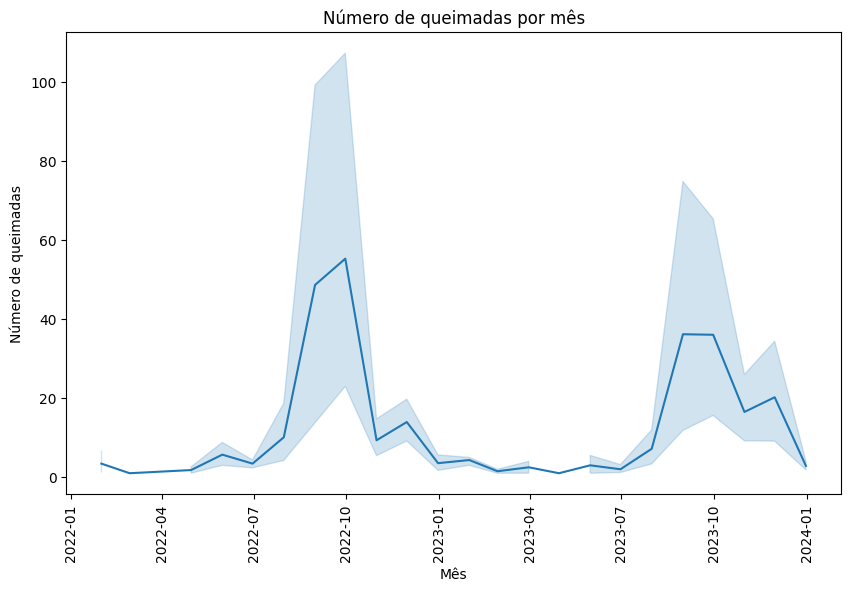

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_filtrados_mensais, x='DataHora', y='Queimada')
plt.xticks(rotation=90)

plt.title('Número de queimadas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de queimadas')
plt.show()

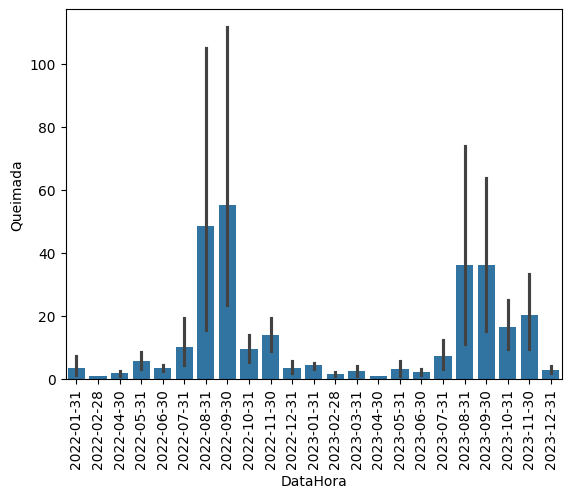

In [ ]:
sns.barplot(data=dados_filtrados_mensais, x='DataHora', y = 'Queimada')
plt.xticks(rotation=90)
# plt.title('Número de queimadas por mês')
# plt.xlabel('Mês')
# plt.ylabel('Número de queimadas')
plt.show()

# Exercícios

1. Leia o arquivo csv;
2. Selecione apenas o satélite AQUA;
3. Faça o pré-processamento (criar coluna Queimada e converter a coluna DateHora para formato de data e agrupar os dados para mensal);
4. Plote o gráfico de linhas.